# Amazigh Alphabets Recognition CNN LeNet-5

# Import libraries

In [1]:
import os
import pandas as pd
from PIL import Image
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Loading dataset

In [2]:
dataset_path = 'dataset/'

In [3]:
images = []
labels = []

In [4]:
# Loop through the folders in the dataset directory
for folder_name in os.listdir(dataset_path):
    # @param folder_name is the name of each directory (folder), in this case, the name of the character
    folder_path = os.path.join(dataset_path, folder_name)
    # @param folder_path is the path to a folder in our dataset, representing a specific character
    if os.path.isdir(folder_path):
        # Loop through the images in that specific character folder
        for filename in os.listdir(folder_path):
            file_path = os.path.join(folder_path, filename)
            try:
                with Image.open(file_path) as img:
                    # Convert the image into a numpy array
                    img_array = np.array(img)
                    # Add the image to our list of images
                    images.append(img_array)
                    # Add the label to our list of labels
                    labels.append(folder_name)
            except Exception as e:
                print(f'Cannot open the image {file_path}: {e}')


In [5]:
# Create a DataFrame
df = pd.DataFrame({'image': images, 'label': labels})

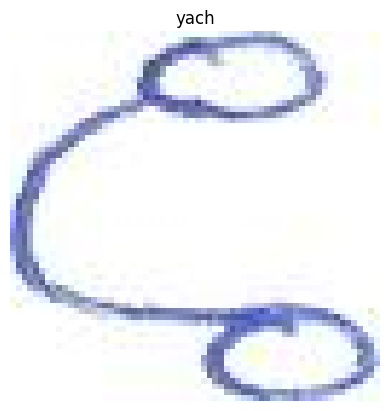

In [6]:
# Function to display an image from our dataset
def show_image(image, title):
    plt.imshow(image, cmap='gray')  # Display the image in grayscale
    plt.title(title)  # Set the title of the plot to the label of the image
    plt.axis('off')   # Hide the axes
    plt.show()        # Show the plot

# Show the image at index 'i' in the dataset
i = 1602
show_image(df['image'].iloc[i], df['label'].iloc[i])

In [7]:
df.head()

,image,label
0,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ya
1,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ya
2,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ya
3,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ya
4,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",ya


In [8]:
# Doing this because in some of dataset there was some gray images
def grayscale_to_rgb(image):
    # Convert a grayscale image to RGB format
    return cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Convert all grayscale images to RGB format
converted_images = []
for img in images:
    # Convert the image to a NumPy array
    img_array = np.array(img)
    
    # Check if the image is grayscale (i.e., has only 2 dimensions)
    if len(img_array.shape) == 2:  # If the image is grayscale
        # Convert the grayscale image to RGB format
        img_array = grayscale_to_rgb(img_array)
    
    # Append the converted image to the list
    converted_images.append(img_array)

# Convert the list of images to a NumPy array
converted_images = np.array(converted_images)

In [9]:
# Check the dimensions of each image
shapes = [img.shape for img in converted_images]
unique_shapes = set(shapes)

# Print the unique image shapes found in the dataset
print("Unique image shapes in the dataset:", unique_shapes)

# Ensure all images have the same shape
if len(unique_shapes) > 1:
    # If there is more than one unique shape, print an error message
    print("Error: Images with different sizes found.")
else:
    # If all images have the same shape, print a confirmation message
    print("All images have the same size.")

Unique image shapes in the dataset: {(64, 64, 3)}
All images have the same size.


In [10]:
# Assign the converted images to the variable `images`
images = converted_images

In [11]:
# If the images do not have 3 channels (RGB) and are instead in grayscale, we need to use np.expand_dims to add the channel dimension.
images.shape

(25740, 64, 64, 3)

In [102]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Divide the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [103]:
print("Image Shape: {}".format(X_train[0].shape), end = '\n\n')
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set:   {} samples".format(len(X_val)))
print("Test Set:       {} samples".format(len(X_test)))

Image Shape: (64, 64, 3)

Training Set:   16473 samples
Validation Set:   4119 samples
Test Set:       5148 samples


# Data preprocessing

## Reshape the image into a 68x68x1 shape

In [104]:
# Padding the images with 2 pixels on each side (top, bottom, left, right)
X_train_padded = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_val_padded = np.pad(X_val, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test_padded = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

print("Updated Image Shape for: ", end='\n\n')
print("-Training set: {}".format(X_train_padded.shape))
print("-Validation set: {}".format(X_val_padded.shape))
print("-Test set: {}".format(X_test_padded.shape))

Updated Image Shape for: 

-Training set: (16473, 68, 68, 3)
-Validation set: (4119, 68, 68, 3)
-Test set: (5148, 68, 68, 3)


## Normalize and subtract the mean from all the data set

In [105]:
# Normalization.
X_train, X_val, X_test = X_train/float(255), X_val/float(255), X_test/float(255)
# Compute the mean of the training data
mean = np.mean(X_train, axis=(0, 1, 2, 3))  # Mean across height, width, and channels
X_train -= mean
X_val   -= mean
X_test  -= mean

# Encode labels

In [106]:
np.unique(labels)

array(['ya', 'yab', 'yach', 'yad', 'yadd', 'yae', 'yaf', 'yag', 'yagh',
       'yagw', 'yah', 'yahh', 'yaj', 'yak', 'yakw', 'yal', 'yam', 'yan',
       'yaq', 'yar', 'yarr', 'yas', 'yass', 'yat', 'yatt', 'yaw', 'yax',
       'yay', 'yaz', 'yazz', 'yey', 'yi', 'yu'], dtype='<U4')

In [107]:
# List of unique characters (or labels)
unique_labels = ['ya', 'yab', 'yach', 'yad', 'yadd', 'yae', 'yaf', 'yag', 'yagh',
                 'yagw', 'yah', 'yahh', 'yaj', 'yak', 'yakw', 'yal', 'yam', 'yan',
                 'yaq', 'yar', 'yarr', 'yas', 'yass', 'yat', 'yatt', 'yaw', 'yax',
                 'yay', 'yaz', 'yazz', 'yey', 'yi', 'yu']
# Create a LabelEncoder object
label_encoder = LabelEncoder()
# Fit the encoder on the unique labels
label_encoder.fit(unique_labels)

LabelEncoder()

In [108]:
# Convert the labels in your dataset
y_train_encoded = label_encoder.transform(y_train)
y_val_encoded = label_encoder.transform(y_val)
y_test_encoded = label_encoder.transform(y_test)

y_train_one_hot = to_categorical(y_train_encoded, num_classes=len(unique_labels))
y_val_one_hot = to_categorical(y_val_encoded, num_classes=len(unique_labels))
y_test_one_hot = to_categorical(y_test_encoded, num_classes=len(unique_labels))

# Data visualization

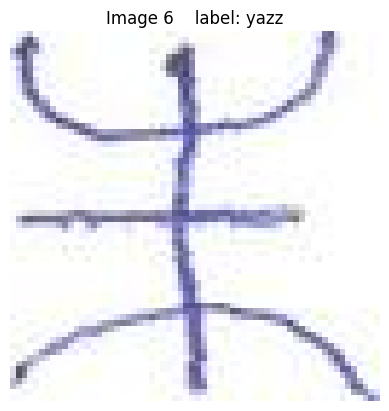

In [109]:
# Index of the image to visualize
index = 6

# Recover the true value of the image (if you subtracted the mean previously)
X_train_visualize = X_train[index] + mean

# Decodifica la etiqueta numérica a la etiqueta de carácter
true_label_encoded = y_train_encoded[index]
true_label = label_encoder.inverse_transform([true_label_encoded])[0]

# Visualize the image
plt.imshow(X_train_visualize)
plt.title(f'Image {index}    label: {true_label}')
plt.axis('off')
plt.show()

# Architecture build

In [110]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model

def build_modified_lenet5_model():
    # Define the input layer
    inputs = Input(shape=(68, 68, 3))

    # C1: (68, 68, 3) -> (64, 64, 6)
    x = Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid')(inputs)

    # P1: (64, 64, 6) -> (32, 32, 6)
    x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
    
    # C2: (32, 32, 6) -> (28, 28, 16)
    x = Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid')(x)
    
    # P2: (28, 28, 16) -> (14, 14, 16)
    x = MaxPooling2D(pool_size=(2, 2), strides=2)(x)
    
    # Flatten: (14, 14, 16) -> (3136,)
    x = Flatten()(x)
    
    # FC1: (3136,) -> (120,)
    x = Dense(120, activation='relu')(x)
    
    # FC2: (120,) -> (84,)
    x = Dense(84, activation='relu')(x)
    
    # FC3: (84,) -> (33,)
    outputs = Dense(33, activation='softmax')(x)
    
    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    
    return model

In [111]:
model = build_modified_lenet5_model()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [112]:
# Check the model summary to verify the shapes
model.summary()

Model: "functional_84"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 68, 68, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 64, 64, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_28 (MaxPooling2D)      │ (None, 32, 32, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 28, 28, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_29 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 120)                 │         376,440 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_44 (Dense)                     │ (None, 33)                  │           2,805 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 392,281 (1.50 MB)

 Trainable params: 392,281 (1.50 MB)

 Non-trainable params: 0 (0.00 B)

In [122]:
history = model.fit(
    X_train_padded, y_train_one_hot,
    epochs=20,
    batch_size=64,
    validation_data=(X_val_padded, y_val_one_hot)
)

Epoch 1/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9839 - loss: 0.0566 - val_accuracy: 0.9602 - val_loss: 0.2652
Epoch 2/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9892 - loss: 0.0447 - val_accuracy: 0.9529 - val_loss: 0.3207
Epoch 3/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9917 - loss: 0.0331 - val_accuracy: 0.9672 - val_loss: 0.1818
Epoch 4/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9933 - loss: 0.0217 - val_accuracy: 0.9410 - val_loss: 0.3430
Epoch 5/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9871 - loss: 0.0568 - val_accuracy: 0.9578 - val_loss: 0.2687
Epoch 6/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9885 - loss: 0.0491 - val_accuracy: 0.9697 - val_loss: 0.2525
Epoch 7/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9895 - loss: 0.0366 - val_accuracy: 0.9655 - val_loss: 0.2836
Epoch 8/20
258/258 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9905 - loss: 0.0402 - val_accu

In [123]:
# saving the model
model.save("modified_lenet5_model.keras")

In [124]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test_one_hot)

print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9722 - loss: 0.3230
Test Accuracy: 0.9710566997528076
Test Loss: 0.3015885353088379


In [125]:
# Save the mean to a file beause will need it to apply it to predict for our images
np.save('mean.npy', mean)

In [132]:
# Evaluar el modelo en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_padded, y_test_one_hot, verbose=0)
print(f'\nTest Set Accuracy: {test_accuracy:.4f}')



Test Set Accuracy: 0.9711


161/161 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


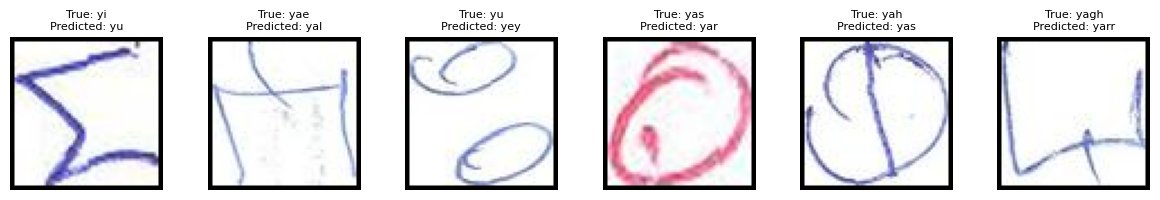

In [127]:
# Get model predictions
y_pred = model.predict(X_test_padded)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels

# Compare with true labels
y_true = np.argmax(y_test_one_hot, axis=1)

# Find indices of incorrect classifications
incorrect_indices = np.where(y_pred_classes != y_true)[0]

# Show some incorrect classifications
num_incorrect_to_show = 6  # Number of incorrect examples to display

# Parameters for the grid
num_columns = min(num_incorrect_to_show, len(incorrect_indices))
num_rows = 1  # Only one row to display the images side by side

# Create a figure for the grid
plt.figure(figsize=(num_columns * 2, num_rows * 2))

for i in range(num_columns):
    idx = incorrect_indices[i]
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(X_test_padded[idx])
    plt.title(f'True: {label_encoder.inverse_transform([y_true[idx]])[0]}\nPredicted: {label_encoder.inverse_transform([y_pred_classes[idx]])[0]}', fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()